In [9]:
from psycopg2 import connect
import pandas.io.sql as pandasql
import pandas as pd
import configparser
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib as mpl
import copy
import matplotlib.dates as mdates
import time

CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\qchen\Documents\qchen.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [199]:
date_key = 20170911

tt_sql = '''--drop table tt_sum;
create temp table tt_sum as(
select bt_id, bt_id_name, trip_id, sum(extract(epoch from (arrivaltime_tostop - arrivaltime_fromstop))) travel_time, 
(timestamp without time zone 'epoch' + (floor((extract('epoch' from arrivaltime_fromstop) / 900 )) * 900) * INTERVAL '1 second') timebin
from ttc.avl a
inner join ttc.ttc_bt_lookup i on (currentstop_pointstop_key = f_id AND lead_pointstop_key = t_id)
where date_key = {0}
group by trip_id, bt_id, bt_id_name, timebin
order by bt_id, bt_id_name, timebin
);

select bt_id, bt_id_name, round(avg(travel_time)::numeric, 0)::integer avg_tt, timebin
from tt_sum
where travel_time > 0
group by bt_id, bt_id_name, timebin
order by bt_id, bt_id_name, timebin'''

travel_times = pandasql.read_sql(tt_sql.format(date_key), con)



stt_sql = '''--drop table stt_sum;
create temp table stt_sum as(
select bt_id, bt_id_name, trip_id, sum(extract(epoch from (scheduledarrivaltime_tostop - scheduledarrivaltime_fromstop))) travel_time, 
(timestamp without time zone 'epoch' + (floor((extract('epoch' from scheduledarrivaltime_fromstop) / 900 )) * 900) * INTERVAL '1 second') timebin
from ttc.avl a
inner join ttc.ttc_bt_lookup i on (currentstop_pointstop_key = f_id AND lead_pointstop_key = t_id)
where date_key = {0}
group by trip_id, bt_id, bt_id_name, timebin
order by bt_id, bt_id_name, timebin
);

select bt_id, bt_id_name, round(avg(travel_time)::numeric, 0)::integer avg_tt, timebin
from stt_sum
where travel_time > 0
group by bt_id, bt_id_name, timebin
order by bt_id, bt_id_name, timebin'''

scheduled_travel_times = pandasql.read_sql(stt_sql.format(date_key), con)

In [200]:
travel_times

,bt_id,bt_id_name,avg_tt,timebin
0,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,193,2017-09-11 00:00:00
1,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,220,2017-09-11 00:15:00
2,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,160,2017-09-11 00:30:00
3,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,204,2017-09-11 00:45:00
4,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,220,2017-09-11 01:00:00
5,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,240,2017-09-11 01:15:00
6,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,220,2017-09-11 05:15:00
7,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,170,2017-09-11 05:30:00
8,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,210,2017-09-11 05:45:00
9,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,203,2017-09-11 06:00:00


In [201]:
scheduled_travel_times

,bt_id,bt_id_name,avg_tt,timebin
0,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,307,2017-09-11 00:00:00
1,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,269,2017-09-11 00:15:00
2,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,289,2017-09-11 00:30:00
3,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,295,2017-09-11 00:45:00
4,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,268,2017-09-11 01:00:00
5,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,307,2017-09-11 01:15:00
6,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,385,2017-09-11 05:00:00
7,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,260,2017-09-11 05:30:00
8,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,277,2017-09-11 05:45:00
9,19,DT-0019. Queen-EB_Roncesvalles-to-Dufferin,343,2017-09-11 06:00:00


In [202]:
def plot_tt(table):
    bt_list = table.bt_id.unique()
    fig, ax = plt.subplots(len(bt_list), 1, sharex = False, sharey = False, figsize = (16, 3*len(bt_list)))
    print('Travel times by Bluetooth segment for ' + str(date_key))
    
    for i, segment in enumerate(bt_list):
        tempdf = table[table['bt_id'] == segment]
        ax[i].plot_date(y = tempdf['avg_tt'],
                     x = tempdf['timebin'],
                     xdate = True,
                     fmt = '-o')
        ax[i].xaxis.set_major_locator(mdates.HourLocator(byhour = range(0,24), interval = 1))
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        ax[i].set_title(tempdf['bt_id_name'].unique()[0])
        for label in ax[i].get_xmajorticklabels():
            label.set_rotation(30)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

Scheduled
Travel times by Bluetooth segment for 20170911


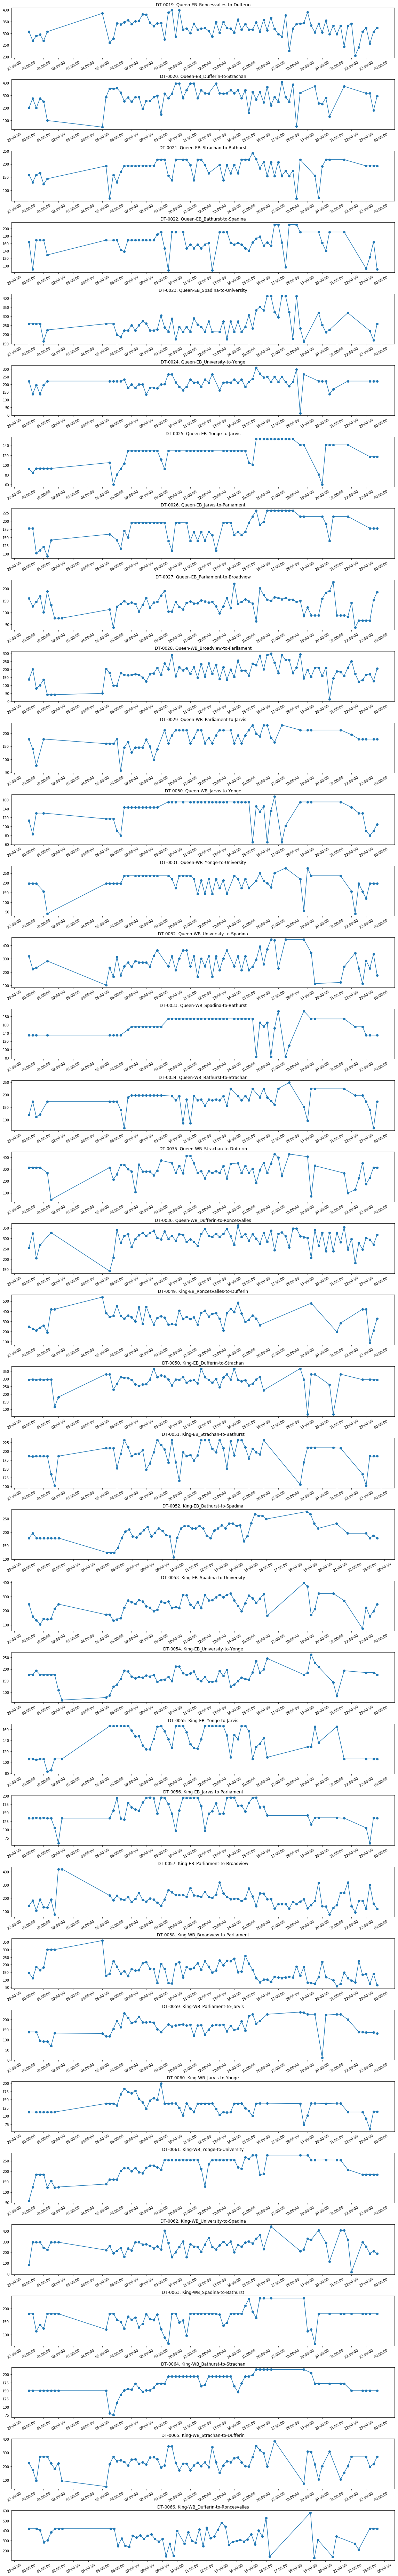

In [203]:
print('Scheduled')
plot_tt(scheduled_travel_times)

Actual
Travel times by Bluetooth segment for 20170911


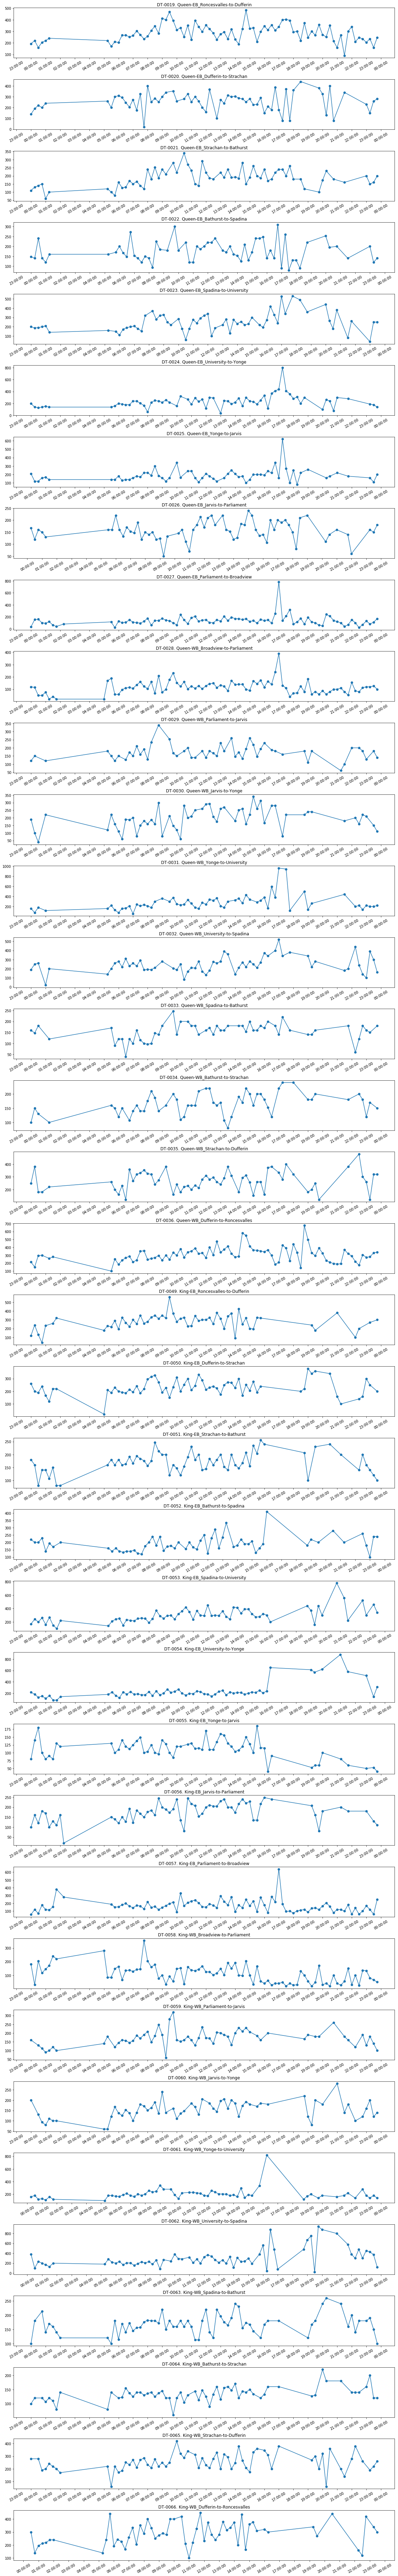

In [204]:
print('Actual')
plot_tt(travel_times)

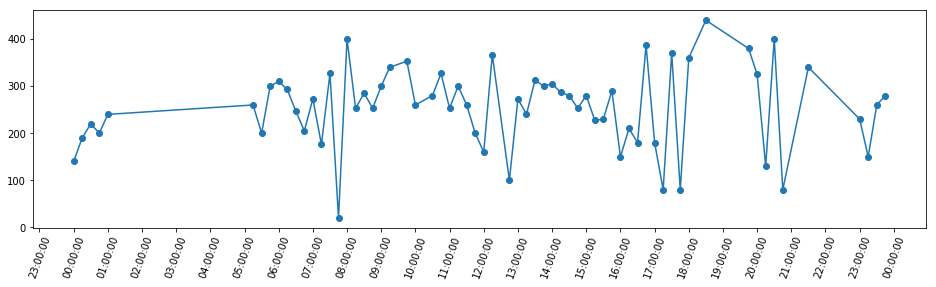

In [87]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.plot_date(y = travel_times['avg_tt'],
             x = travel_times['timebin'],
             xdate = True,
             fmt = '-o')
ax.xaxis.set_major_locator(mdates.HourLocator(byhour = range(0,24), interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=70)
plt.show()